In [4]:
# Load in dataframe all the traces from directory 
from metrics import parseTraces, maker_mahimahi_trace
import pandas as pd
from datetime import datetime
import time

input_path = '../traces/group1/'


#t = df.time
#bw = df['DL_bitrate']

#group = "gp1"

In [2]:
import os
import pandas as pd

# plot graph 
import seaborn as sns
import matplotlib.pyplot as plt

input_path = '../traces/group1/'

%matplotlib inline
frames = []
for dirpath, subdirpath, filenames in os.walk(input_path):
        for filename in [f for f in filenames if any(filetype in f.lower() for filetype in ['csv'])]:
            current_file = os.path.join(dirpath, filename)
            print("input file: {}".format(current_file))
            df = pd.read_csv(current_file)
            df['tracer']= filename.split('.')[4]
            frames.append(df)
result = pd.concat(frames)

input file: ../traces/group1/B_2020.02.14_09.38.22.csv
input file: ../traces/group1/B_2019.12.14_10.16.30.csv
input file: ../traces/group1/B_2019.11.28_10.14.25.csv
input file: ../traces/group1/B_2019.12.16_07.22.43.csv
input file: ../traces/group1/B_2020.02.13_13.03.24.csv
input file: ../traces/group1/B_2019.12.16_14.23.32.csv
input file: ../traces/group1/B_2019.11.28_07.27.57.csv
input file: ../traces/group1/B_2019.12.01_12.11.21.csv
input file: ../traces/group1/B_2020.02.14_07.29.00.csv
input file: ../traces/group1/B_2019.12.04_14.24.21.csv
input file: ../traces/group1/B_2020.02.14_12.58.17.csv
input file: ../traces/group1/B_2019.12.03_07.29.22.csv
input file: ../traces/group1/B_2020.02.27_20.35.57.csv
input file: ../traces/group1/B_2019.12.02_12.41.17.csv
input file: ../traces/group1/B_2019.12.06_11.49.24.csv
input file: ../traces/group1/B_2019.12.06_09.32.38.csv
input file: ../traces/group1/B_2019.12.04_07.26.30.csv
input file: ../traces/group1/B_2019.12.17_07.32.39.csv
input file

In [27]:
result.head()

,time,DL_bitrate,tracer
0,0,4183,22
1,1,4183,22
2,2,1807,22
3,3,2492,22
4,4,4001,22


No handles with labels found to put in legend.


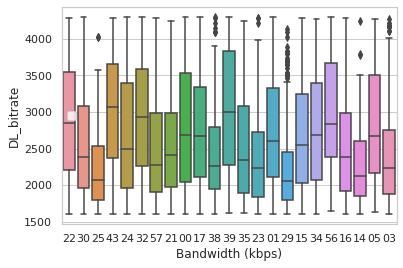

In [29]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="tracer", y="DL_bitrate", data=result,rotat)
    
plt.xlabel('Bandwidth (kbps)', fontsize=12)
plt.legend()
plt.show()

         DL_bitrate                          ci_hi        ci_lo
               mean count         std                          
tracer                                                         
00      2796.028169   355  794.439016  2878.668963  2713.387375
01      2738.319955   897  739.127047  2786.689385  2689.950526
03      2405.085635   362  682.018189  2475.342661  2334.828609
05      2813.361842   152  790.491167  2939.029441  2687.694243
14      2271.328358   134  534.038012  2361.749058  2180.907659
15      2676.486239   545  761.970998  2740.457996  2612.514481
16      2513.837321   627  689.918773  2567.839624  2459.835017
17      2758.477876   452  742.134933  2826.894517  2690.061235
21      2536.822835   254  687.903417  2621.420563  2452.225107
22      2888.375940   399  793.569519  2966.241717  2810.510163
23      2370.084821   224  622.818357  2451.646374  2288.523268
24      2687.458268   635  808.036813  2750.306400  2624.610135
25      2221.190141   142  502.015412  2

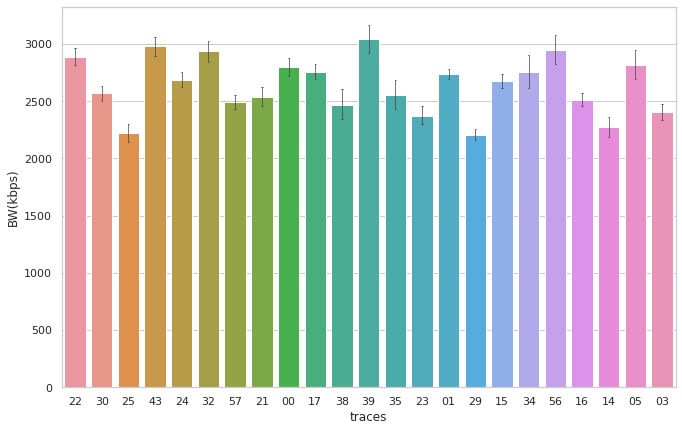

In [36]:
import math 
import scipy.stats as st
import numpy as np

def conf_intervals(stats,ci=0.95):
    ci_hi = []
    ci_lo = []
    for i in stats.index:
        m, c, s = stats.loc[i]
        if(c >= 30):
            ci_=st.norm.interval(alpha=ci, loc=m, scale=s/np.sqrt(c))
        else:
            ci_=st.t.interval(alpha=0.95, df=c-1, loc=m, scale=s/np.sqrt(c))
        ci_hi.append(ci_[1])
        ci_lo.append(ci_[0])

    stats['ci_hi'] = ci_hi
    stats['ci_lo'] = ci_lo
    return stats

stats = result[['DL_bitrate','tracer']].groupby(['tracer']).agg(['mean', 'count', 'std'])
ci = 0.95
stats = conf_intervals(stats,ci=0.95)
print(stats)


fig, bar = plt.subplots(figsize = (11,7))
ax = sns.barplot(x="tracer", y="DL_bitrate", data=result,
                 capsize=.05,ci=ci*100,errwidth=0.7)
ax.set_xlabel("traces")
ax.set_ylabel("BW(kbps)")
plt.show()

2205.5784753363228

3039.4670658682635